# Trabajo Practico Nicolas Pereyra N7
## 1) Realizar los ejercicios 2 y 3 del TP5 de Filtros digitales:
### Ejercicio #2
Se desea emular digitalmente la característica de un filtro analógico pasa bajos Butterworth de
orden 2, con .𝑓𝑐 = 1 𝑘𝐻𝑧  

A- Para aplicando transformación bilineal, obtener un filtro con respuesta𝑓𝑠 = 100 𝑘𝐻𝑧 cuyo comportamiento emule al Butterworth analógico.𝐻(𝑧) Trazar la respuesta en frecuencia de módulo y fase de ambos filtros sobre un mismo
gráfico para establecer comparaciones.  
B. Repetir el punto anterior para .𝑓𝑠 = 10 𝑘𝐻𝑧  
C. Repetir los puntos A) y B) si se desea emular digitalmente la característica de un filtro analógico pasa altos Butterworth de orden 2, con 𝑓𝑐 = 6 𝑘𝐻𝑧  
D. Indique en cuál de los 3 casos ( A, B ó C ) justificaría rediseñar aplicando prewarping.
Explique el motivo en pocas palabras

# A)

In [83]:
from scipy import signal
import numpy as np
from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap
from pytc2.general import print_subtitle
import sympy as sp

#$Tf = \frac{3,94.10^{7}}{s²+8,88.10³.s+3,94.10^{7}}$
n = 2
fc = 10**3
wc = 2*np.pi*fc
b_lp, a_lp = signal.butter(n, 1, 'low', analog=True)
tf_lp = signal.TransferFunction(b_lp,a_lp)
print_subtitle("Funcion transferencia:")

#### Funcion transferencia:

<font size = 5><center>
$Tf = \frac{w_c²}{s²+w_c.\sqrt{2}.s+w_c²}$

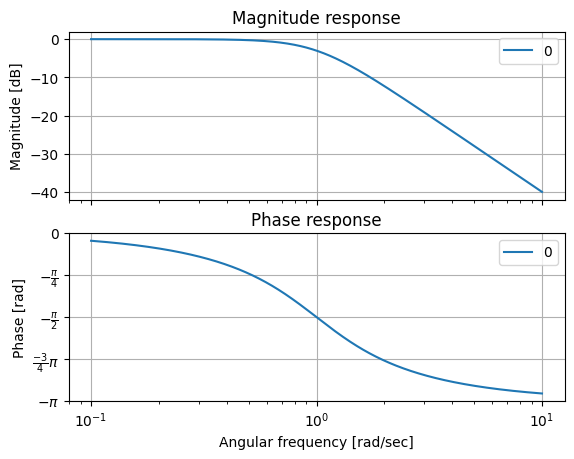

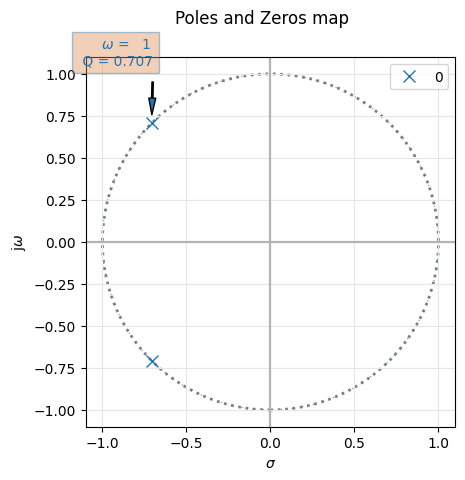

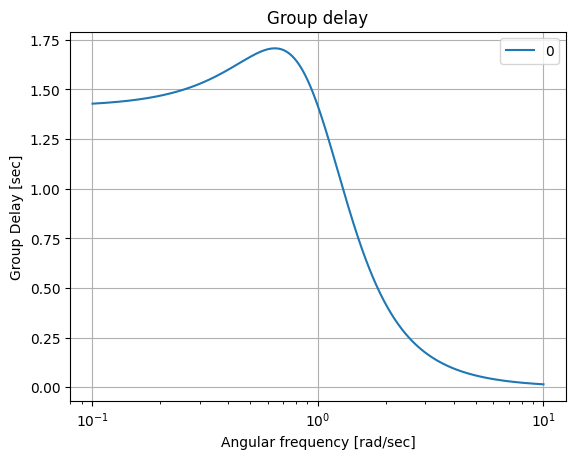

In [3]:
analyze_sys(tf_lp)

## Nucleo de transformacion Bilineal:
<font size = 4><center>
$k = 2.f_s$  
$k_l = \frac{k}{w_c}$  
$s = k_l\frac{1-z^{-1}}{1+z^{-1}}$  
</font></center>

In [70]:
import sympy as sp
from sympy import collect, simplify, expand, poly
import numpy as np

#wc = sp.symbols('wc',complex=True)
z = sp.symbols('z',complex=True)
kl = sp.symbols('kl',complex=True)

#fs = 100*10**3
#fs = 1
#fc = 10**3
#k = 2*np.pi*fc/np.tan(np.pi*fc/fs) En caso de querer poner un prewarping
#$k = \frac{2.\pi.fp}{tg(\pi\frac{fp}{fs})}$  
k = 2*fs  #Sin  prewarping
#wc = 2*np.pi*fc
wc = 1

s = kl*((1-z**(-1))/(1+z**(-1)))

tf_z = (1)/(s**2+s*(2**(1/2))+1)
print_subtitle("Funcion transferencia Z:")
display(simplify(collect(expand(simplify(collect(tf_z,z))),z)))

#### Funcion transferencia Z:

(z**2 + 2*z + 1)/(kl**2 - 1.4142135623731*kl + z**2*(kl**2 + 1.4142135623731*kl + 1) - 2*z*(kl**2 - 1) + 1)

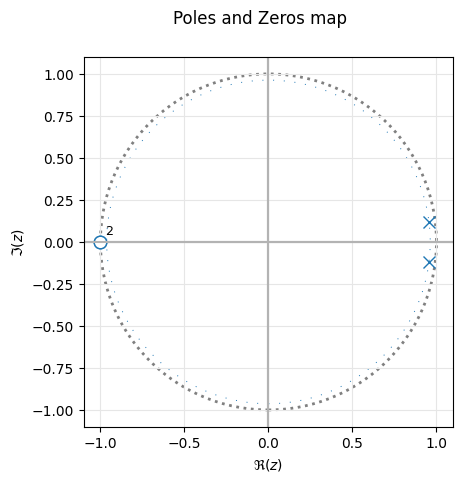

In [150]:
from scipy import signal
from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap
from pytc2.general import print_subtitle

fs = 100*10**3
k = 2*fs
wc = 2*np.pi*10**3
kl = k/wc

T = 1/fs
b_z = [1,2,1]
a_z = [(kl**2+kl*(2**(1/2))+1),-2*(kl**2-1),kl**2+1-kl*(2*(1/2))]
tf_z = signal.TransferFunction(b_z,a_z, dt = T)
pzmap(tf_z,digital = True, fs = fs)

b_lp, a_lp = signal.butter(n, wc, 'low', analog=True)
tf_s = signal.TransferFunction(b_lp,a_lp)

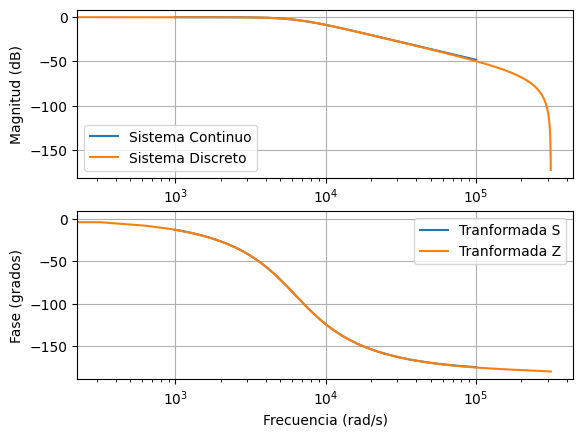

In [136]:
import matplotlib.pyplot as plt
from scipy import signal

system_discrete = signal.dlti(b_z, a_z, dt=T)  # dt es el período de muestreo

# Calcula las respuestas en frecuencia (Bode plot) para el sistema discreto
w_discrete, mag_discrete, phase_discrete = signal.dlti.bode(system_discrete, 10**3)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema continuo
w_continuous, mag_continuous, phase_continuous = signal.bode(tf_s, 10**2)

# Crea una figura para el gráfico
plt.figure()

# Gráfico de magnitud
plt.subplot(2, 1, 1)
plt.semilogx(w_continuous, mag_continuous, label='Sistema Continuo')
plt.semilogx(w_discrete, mag_discrete, label='Sistema Discreto')
plt.grid(True)
plt.ylabel('Magnitud (dB)')
plt.legend()

# Gráfico de fase
plt.subplot(2, 1, 2)
plt.semilogx(w_continuous, phase_continuous, label='Tranformada S')
plt.semilogx(w_discrete, phase_discrete, label='Tranformada Z')
plt.grid(True)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.legend()

# Mostrar el gráfico
plt.show()

### En el siguiente codigo se puede observar como se llego al mismo resultado pero utilizando exclusibamente herramientas del scipy

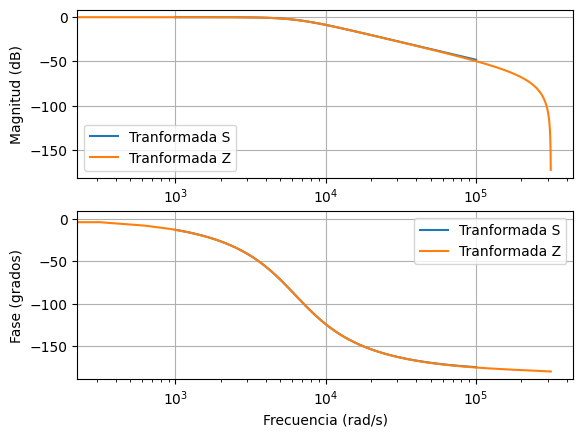

In [141]:
## Calculos anteriores pero utilizando funciones especificas
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

fs = 100*10**3
fc = 10**3
wc = 2*np.pi*fc
Ts = 1/fs  #Periodo de muestreo
# Dominio S
b_lp, a_lp = signal.butter(n, wc, 'low', analog=True)
tf_lp = signal.TransferFunction(b_lp,a_lp)

# Dominio Z
b_z, a_z = signal.bilinear(b_lp, a_lp, fs)
tf_z = signal.dlti(b_z,a_z, dt = Ts)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema discreto
w_discrete, mag_discrete, phase_discrete = signal.dlti.bode(tf_z, 10**3)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema continuo
w_continuous, mag_continuous, phase_continuous = signal.bode(tf_lp, 10**2)

# Crea una figura para el gráfico
plt.figure()

# Gráfico de magnitud
plt.subplot(2, 1, 1)
plt.semilogx(w_continuous, mag_continuous, label='Tranformada S')
plt.semilogx(w_discrete, mag_discrete, label='Tranformada Z')
plt.grid(True)
plt.ylabel('Magnitud (dB)')
plt.legend()

# Gráfico de fase
plt.subplot(2, 1, 2)
plt.semilogx(w_continuous, phase_continuous, label='Tranformada S')
plt.semilogx(w_discrete, phase_discrete, label='Tranformada Z')
plt.grid(True)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.legend()

# Mostrar el gráfico
plt.show()

De igual forma se puede observar que en ambos graficos la señal queda intacta antes de la frecuencia de corte permaneciendo asi en la primera decada. Otra cosa que se puede observar es el cero en $2.f_s$ como era esperable 

# B)
## Repetir el punto anterior pero con $f_s = 10kHz$

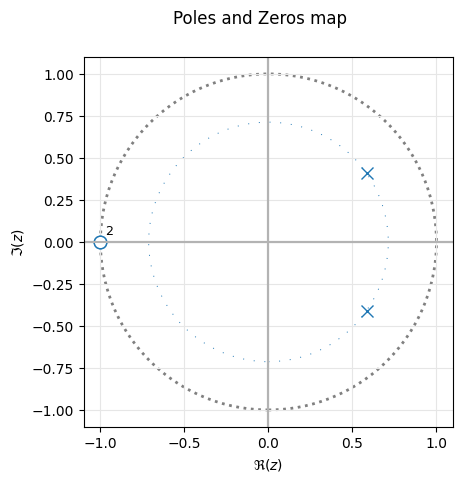

In [148]:
from scipy import signal
from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap
from pytc2.general import print_subtitle

fs = 10*10**3
k = 2*fs
wc = 2*np.pi*10**3
kl = k/wc

T = 1/fs
b_z = [1,2,1]
a_z = [(kl**2+kl*(2**(1/2))+1),-2*(kl**2-1),kl**2+1-kl*(2*(1/2))]
tf_z = signal.TransferFunction(b_z,a_z, dt = T)
pzmap(tf_z,digital = True, fs = fs)
b_lp, a_lp = signal.butter(n, wc, 'low', analog=True)
tf_s = signal.TransferFunction(b_lp,a_lp)

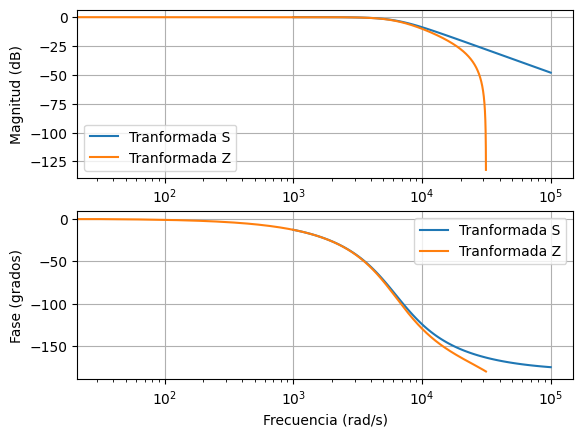

In [145]:
## Calculos anteriores pero utilizando funciones especificas
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

fs = 10*10**3
fc = 10**3
wc = 2*np.pi*fc
Ts = 1/fs  #Periodo de muestreo
# Dominio S
b_lp, a_lp = signal.butter(n, wc, 'low', analog=True)
tf_lp = signal.TransferFunction(b_lp,a_lp)

# Dominio Z
b_z, a_z = signal.bilinear(b_lp, a_lp, fs)
tf_z = signal.dlti(b_z,a_z, dt = Ts)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema discreto
w_discrete, mag_discrete, phase_discrete = signal.dlti.bode(tf_z, 10**3)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema continuo
w_continuous, mag_continuous, phase_continuous = signal.bode(tf_lp, 10**2)

# Crea una figura para el gráfico
plt.figure()

# Gráfico de magnitud
plt.subplot(2, 1, 1)
plt.semilogx(w_continuous, mag_continuous, label='Tranformada S')
plt.semilogx(w_discrete, mag_discrete, label='Tranformada Z')
plt.grid(True)
plt.ylabel('Magnitud (dB)')
plt.legend()

# Gráfico de fase
plt.subplot(2, 1, 2)
plt.semilogx(w_continuous, phase_continuous, label='Tranformada S')
plt.semilogx(w_discrete, phase_discrete, label='Tranformada Z')
plt.grid(True)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.legend()

# Mostrar el gráfico
plt.show()

Como era esperable el filtro butterworth se deformo completamente al pasarlo del mundo analogico al digital tras reducir considerablemente
la $f_s$. Pasando de tener una frecuencia de corte al $1$% de la frecuencia de muestreo a tener la frecuencia de corte al $10$% de la frecuencia de muestreo.

# C)

#### Fs = 100kHz y Fc = 6KHz

#### Polos y ceros de la transformada Z

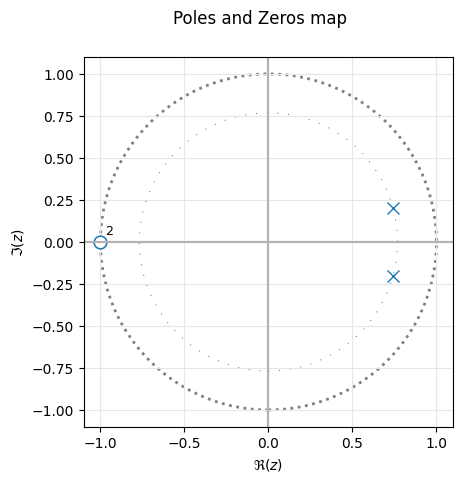

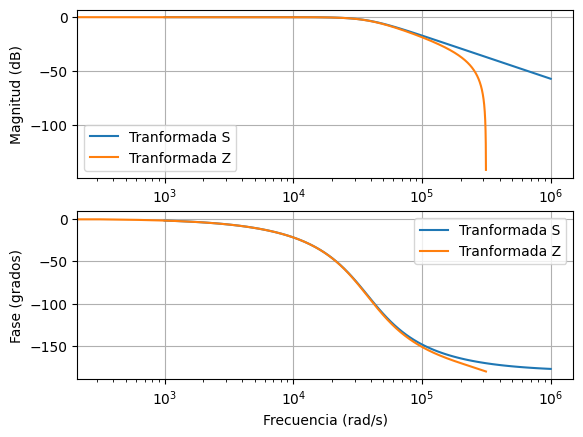

In [146]:
## Calculos anteriores pero utilizando funciones especificas
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap
from pytc2.general import print_subtitle

print_subtitle("Fs = 100kHz y Fc = 6KHz")

fs = 100*10**3
fc = 6*10**3
wc = 2*np.pi*fc
Ts = 1/fs  #Periodo de muestreo
# Dominio S
b_lp, a_lp = signal.butter(n, wc, 'low', analog=True)
tf_lp = signal.TransferFunction(b_lp,a_lp)

# Dominio Z
b_z, a_z = signal.bilinear(b_lp, a_lp, fs)
tf_z = signal.dlti(b_z,a_z, dt = Ts)

print_subtitle("Polos y ceros de la transformada Z")
pzmap(tf_z,digital = True, fs = fs)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema discreto
w_discrete, mag_discrete, phase_discrete = signal.dlti.bode(tf_z, 10**3)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema continuo
w_continuous, mag_continuous, phase_continuous = signal.bode(tf_lp, 10**2)

# Crea una figura para el gráfico
plt.figure()

# Gráfico de magnitud
plt.subplot(2, 1, 1)
plt.semilogx(w_continuous, mag_continuous, label='Tranformada S')
plt.semilogx(w_discrete, mag_discrete, label='Tranformada Z')
plt.grid(True)
plt.ylabel('Magnitud (dB)')
plt.legend()

# Gráfico de fase
plt.subplot(2, 1, 2)
plt.semilogx(w_continuous, phase_continuous, label='Tranformada S')
plt.semilogx(w_discrete, phase_discrete, label='Tranformada Z')
plt.grid(True)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.legend()

# Mostrar el gráfico
plt.show()

#### Fs = 10kHz y Fc = 6KHz

#### Polos y ceros de la transformada Z

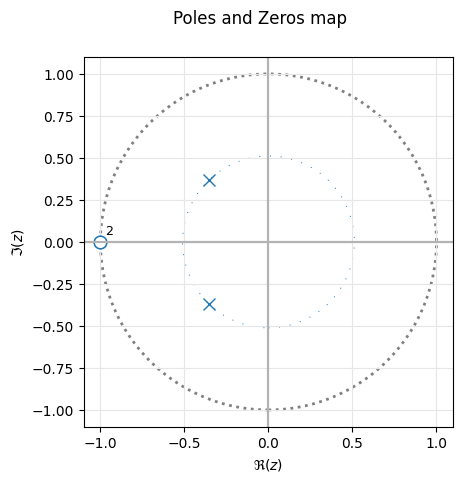

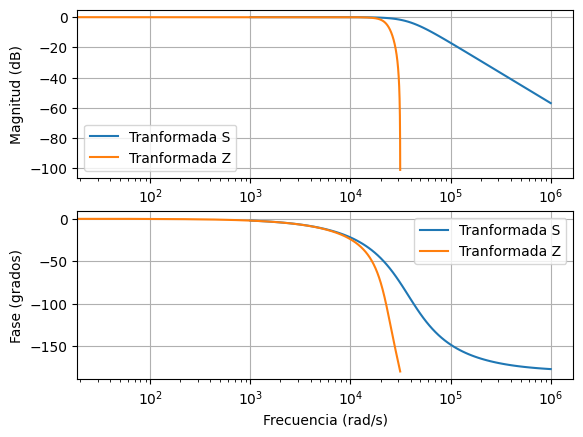

In [151]:
## Calculos anteriores pero utilizando funciones especificas
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap
from pytc2.general import print_subtitle

print_subtitle("Fs = 10kHz y Fc = 6KHz")

fs = 10*10**3
fc = 6*10**3
wc = 2*np.pi*fc
Ts = 1/fs  #Periodo de muestreo
# Dominio S
b_lp, a_lp = signal.butter(n, wc, 'low', analog=True)
tf_lp = signal.TransferFunction(b_lp,a_lp)

# Dominio Z
b_z, a_z = signal.bilinear(b_lp, a_lp, fs)
tf_z = signal.dlti(b_z,a_z, dt = Ts)

print_subtitle("Polos y ceros de la transformada Z")
pzmap(tf_z,digital = True, fs = fs)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema discreto
w_discrete, mag_discrete, phase_discrete = signal.dlti.bode(tf_z, 10**3)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema continuo
w_continuous, mag_continuous, phase_continuous = signal.bode(tf_lp, 10**2)

# Crea una figura para el gráfico
plt.figure()

# Gráfico de magnitud
plt.subplot(2, 1, 1)
plt.semilogx(w_continuous, mag_continuous, label='Tranformada S')
plt.semilogx(w_discrete, mag_discrete, label='Tranformada Z')
plt.grid(True)
plt.ylabel('Magnitud (dB)')
plt.legend()

# Gráfico de fase
plt.subplot(2, 1, 2)
plt.semilogx(w_continuous, phase_continuous, label='Tranformada S')
plt.semilogx(w_discrete, phase_discrete, label='Tranformada Z')
plt.grid(True)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.legend()

# Mostrar el gráfico
plt.show()

Como se puede observar en estos graficos el filtro con una $f_s$ de $100kHz$ comienza a tenere a tener una distorcion frente al filtro analogico en una etapa mas temprana pero sigue siendo considerablemente similar. Mientras en el filtro de $f_s$ de $10KHz$ el filtro digital no se comporta como butterworth en ningun momento.

# D)

Tras utilizar el preguarping en cada uno de los puntos anteriores no lo vimos necesario en ninguno de los filtros.

31.82051595377396
31.83098861837907


#### Fs = 100kHz y Fc = 6KHz

#### Polos y ceros de la transformada Z Prewarping

#### Polos y ceros de la transformada Z Sin Prewarping

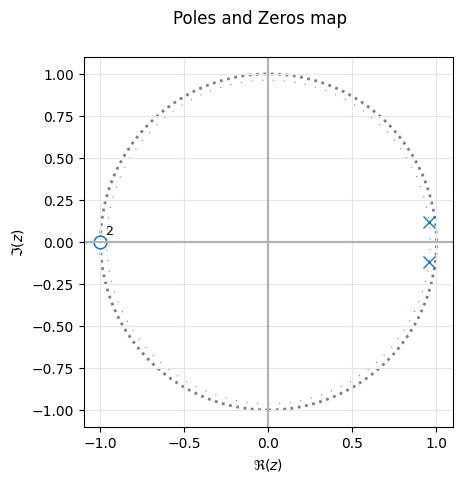

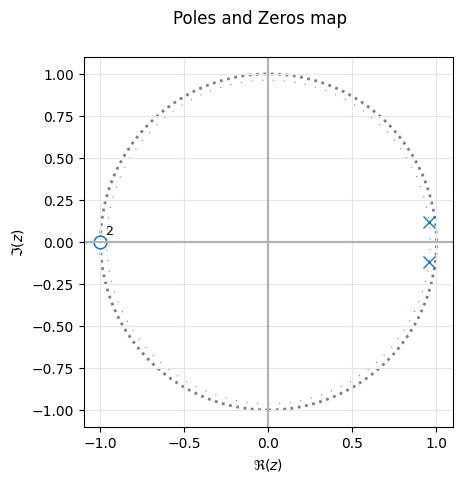

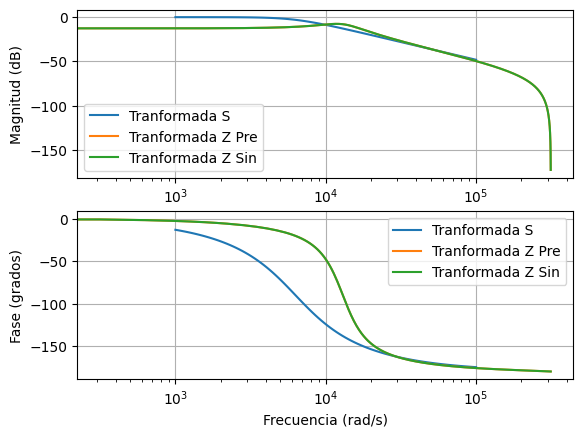

In [15]:
from scipy import signal
from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap
from pytc2.general import print_subtitle
import numpy as np
import matplotlib.pyplot as plt

n = 2
fs = 100*10**3
fc = 1*10**3
wc = 2*np.pi*fc 
#k = 2*np.pi*fc/(np.tan(np.pi*fc/fs)) #En caso de querer poner un prewarping#
#k = (wc)/(np.tan(wc/(2*fs)))
k = wc/np.tan(wc/(2*fs))
k2 = 2*fs 
kl = k/wc #k Con prewarping
kl2 = k2/wc #k sin prewarping
Ts = 1/fs

print(kl)
print(kl2)
print_subtitle("Fs = 100kHz y Fc = 6KHz")
# Dominio S
b_lp, a_lp = signal.butter(n, wc, 'low', analog=True)
tf_lp = signal.TransferFunction(b_lp,a_lp)

# Dominio Z Prewarping
b_z = [1,2,1]
a_z = [(kl**2+kl*(2**(1/2))+1),-2*(kl**2-1),kl**2+1-kl*(2*(1/2))]
tf_z = signal.dlti(b_z,a_z, dt = Ts)

# Dominio Z Sin prewarping
b_z2 = [1,2,1]
a_z2 = [(kl2**2+kl2*(2**(1/2))+1),-2*(kl2**2-1),kl2**2+1-kl2*(2*(1/2))]
tf_z2 = signal.dlti(b_z,a_z, dt = Ts)

print_subtitle("Polos y ceros de la transformada Z Prewarping")
pzmap(tf_z,digital = True, fs = fs)
print_subtitle("Polos y ceros de la transformada Z Sin Prewarping")
pzmap(tf_z2,digital = True, fs = fs)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema discreto
w_discrete, mag_discrete, phase_discrete = signal.dlti.bode(tf_z, 10**3)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema discreto SIN PREWARPING
w_discrete2, mag_discrete2, phase_discrete2 = signal.dlti.bode(tf_z2, 10**3)

# Calcula las respuestas en frecuencia (Bode plot) para el sistema continuo
w_continuous, mag_continuous, phase_continuous = signal.bode(tf_lp, 10**2)

# Crea una figura para el gráfico
plt.figure()

# Gráfico de magnitud
plt.subplot(2, 1, 1)
plt.semilogx(w_continuous, mag_continuous, label='Tranformada S')
plt.semilogx(w_discrete, mag_discrete, label='Tranformada Z Pre')
plt.semilogx(w_discrete2, mag_discrete2, label='Tranformada Z Sin')
plt.grid(True)
plt.ylabel('Magnitud (dB)')
plt.legend()

# Gráfico de fase
plt.subplot(2, 1, 2)
plt.semilogx(w_continuous, phase_continuous, label='Tranformada S')
plt.semilogx(w_discrete, phase_discrete, label='Tranformada Z Pre')
plt.semilogx(w_discrete2, phase_discrete2, label='Tranformada Z Sin')
plt.grid(True)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.legend()

# Mostrar el gráfico
plt.show()

# EJercicio 3:

Dadas las siguientes respuestas al impulso se pide:  
● Transferencia del sistema 𝐻 𝑧( )  
● Singularidades en el plano 𝑧  
● Respuesta de módulo y fase  
a) Filtro de media móvil (moving average).
significa yℎ1 𝑘( ) = 1, 1( ) ℎ 0( ) = 1 ℎ 1( ) = 1
ℎ2 𝑘( ) = 1, 1, 1( )
1. ¿Qué modificación debería implementarse para que la salida representa la media
aritmética?
2. Para el último sistema, ¿qué frecuencia de muestreo se debería adoptar si se quisiera
eliminar con dicho filtro la interferencia causada por la frecuencia de línea de 50 Hz

b) Filtro diferenciador
de primer ordenℎ1 𝑘( ) = 1, − 1( )
de segundo ordenℎ2 𝑘( ) = 1, 0, − 1( )
1. ¿Qué demora introducen ambos sistemas?
2. Hasta qué frecuencias estos sistemas se comportan como un derivador ideal. Considere
una tolerancia admisible del 5% respecto a su respuesta ideal .

# A)
## 1)

$h_1(z)=(1,1) = 1+z^{-1}=\frac{z+1}{z} \Rightarrow h_1(\Omega)=2.cos(\frac{\Omega}{2}).e^{-\frac{\Omega.j}{2}}$  
$h_2(z)=(1,1,1) = 1+z^{-1}+z^{-2}=\frac{z²+z+1}{z²} \Rightarrow h_2(\Omega)=(2.cos(\Omega)+1).e^{-\Omega.j}$

Dato importante a observar, para poder apreciar correctamente el comportamiendo de la transferencia de una transformada z tuve que expresar los ejes en terminos de veces y no en decibelios.

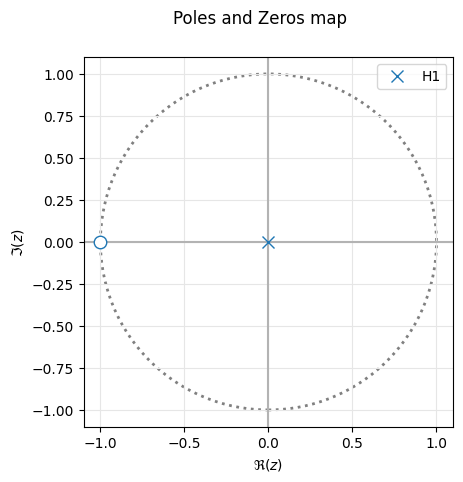

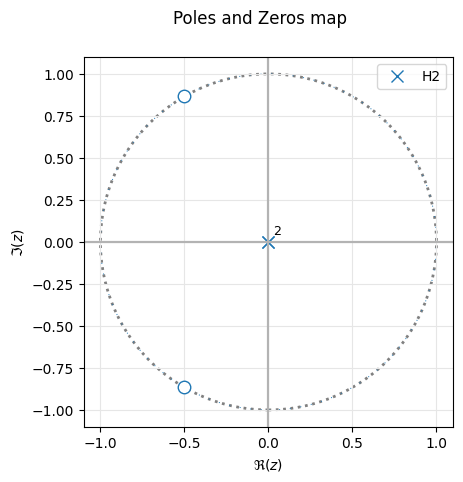

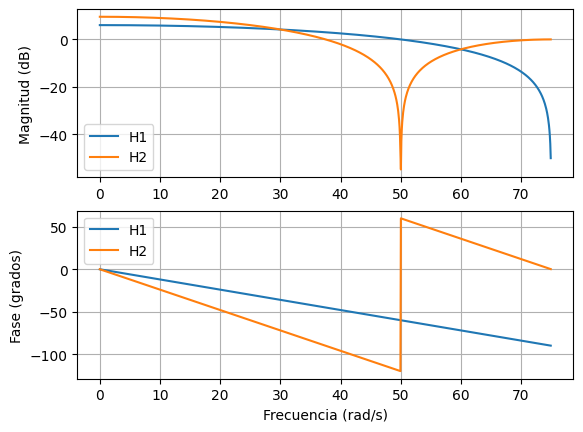

In [36]:
## Calculos anteriores pero utilizando funciones especificas
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap
from pytc2.general import print_subtitle

fs = 150/(2*np.pi)  #En este caso se dividio por 2*pi para poder observar en el grafico el corte en 50 rads/seg
# H1
h1 = signal.dlti([1,1],[1,0],dt = 1/fs)
# H2
h2 = signal.dlti([1,1,1],[1,0,0],dt = 1/fs)

pzmap(h1,digital = True,filter_description="H1")
pzmap(h2,digital = True,filter_description="H2")

w_h1, mag_h1, phase_h1 = signal.dlti.bode(h1, 10**3)
w_h2, mag_h2, phase_h2 = signal.dlti.bode(h2, 10**3)

# Crea una figura para el gráfico
plt.figure()

# Gráfico de magnitud
plt.subplot(2, 1, 1)
plt.plot(w_h1, mag_h1, label='H1')
plt.plot(w_h2, mag_h2, label='H2')
plt.grid(True)
plt.ylabel('Magnitud (dB)')
plt.legend()

# Gráfico de fase
plt.subplot(2, 1, 2)
plt.plot(w_h1, phase_h1, label='H1')
plt.plot(w_h2, phase_h2, label='H2')
plt.grid(True)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.legend()

# Mostrar el gráfico
plt.show()

1) Para que la salida representa la media arigmetica se tendra que divir la transferencia por 1 mas el coeficiente de mayor orden, en el caso de h1 se debera dividir por 2 y en el caso de h2 se debera dividir por 3.
2) Para que h2 tenga un cero en $50Hz$ se debera muestriar con una frecuencia de $150Hz$
## B)

$h_1(z)=(1,-1) = 1-z^{-1}=\frac{z-1}{z} \Rightarrow h_1(\Omega)=2.sen(\frac{\Omega}{2}).e^{-\frac{\pi+\Omega.j}{2}}$  
$h_2(z)=(1,0,-1) = 1-z^{-2}=\frac{z²-1}{z²} \Rightarrow h_2(\Omega)=(2.sen(\Omega)+1).e^{(\frac{\pi}{2}-\Omega).j}$

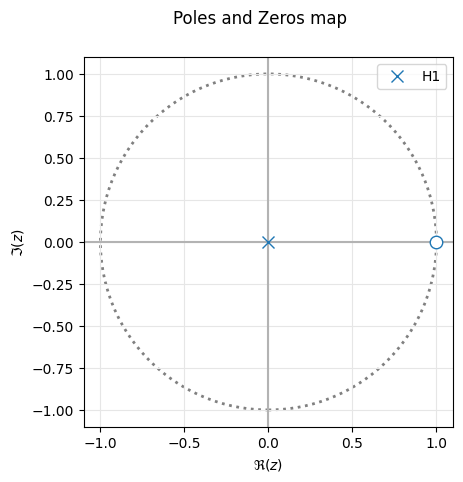

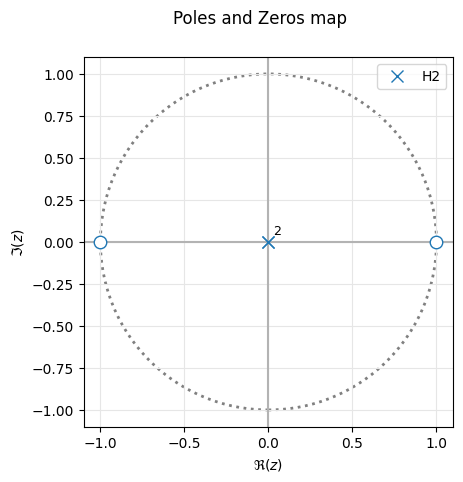

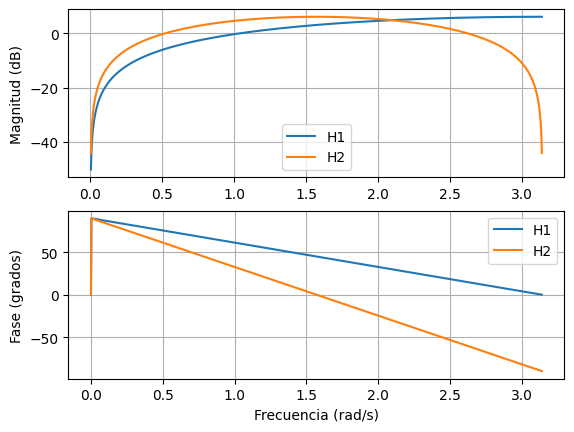

In [37]:
## Calculos anteriores pero utilizando funciones especificas
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap
from pytc2.general import print_subtitle

# H1
h1 = signal.dlti([1,-1],[1,0])
# H2
h2 = signal.dlti([1,0,-1],[1,0,0])

pzmap(h1,digital = True,filter_description="H1")
pzmap(h2,digital = True,filter_description="H2")

w_h1, mag_h1, phase_h1 = signal.dlti.bode(h1, 10**3)
w_h2, mag_h2, phase_h2 = signal.dlti.bode(h2, 10**3)

# Crea una figura para el gráfico
plt.figure()

# Gráfico de magnitud
plt.subplot(2, 1, 1)
plt.plot(w_h1, mag_h1, label='H1')
plt.plot(w_h2, mag_h2, label='H2')
plt.grid(True)
plt.ylabel('Magnitud (dB)')
plt.legend()

# Gráfico de fase
plt.subplot(2, 1, 2)
plt.plot(w_h1, phase_h1, label='H1')
plt.plot(w_h2, phase_h2, label='H2')
plt.grid(True)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.legend()

# Mostrar el gráfico
plt.show()

1) El sistema h1 introduce una demora de 1/2 mientras el sistema h2 introduce una demora entera de 1.
2) Considerando al derivador ideal como una recta unitaria la cual parte del origen y utilizando la formula del error para obtener una respuesta numerica consegui los siguientes resultados numericos.
$er% = \frac{derIdel-h}{derIdel}*100$
  
Para h1:  
<font size = 5><center>
$er1 = \frac{w-2.sen(w/2)}{w}.100$  
</center>
Para h2: 
<font size = 5><center>
$er2 = \frac{w-2.sen(w)}{w}.100$
</center>


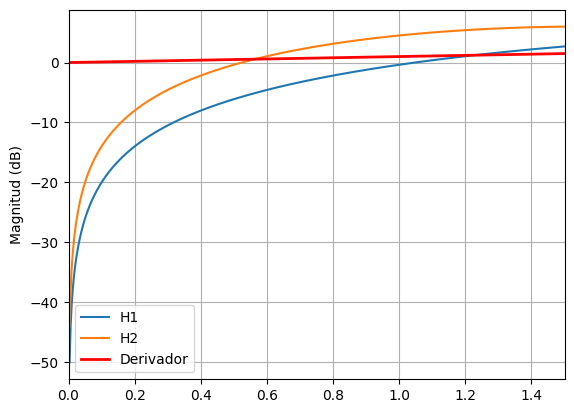

In [53]:
## Calculos anteriores pero utilizando funciones especificas
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap
from pytc2.general import print_subtitle

# H1
h1 = signal.dlti([1,-1],[1,0])
# H2
h2 = signal.dlti([1,0,-1],[1,0,0])

w_h1, mag_h1, phase_h1 = signal.dlti.bode(h1, 10**3)
w_h2, mag_h2, phase_h2 = signal.dlti.bode(h2, 10**3)

# Coordenadas de los puntos que forman la línea recta
x = [0, 1,1.5]
y = [0, 1,1.5]

# Crea una figura para el gráfico
plt.figure()

# Gráfico de magnitud
plt.xlim(0,1.5)
plt.plot(w_h1, mag_h1, label='H1')
plt.plot(w_h2, mag_h2, label='H2')
plt.plot(x, y, label='Derivador', color='red', linestyle='solid', linewidth=2)
plt.grid(True)
plt.ylabel('Magnitud (dB)')
plt.legend()


# Mostrar el gráfico
plt.show()

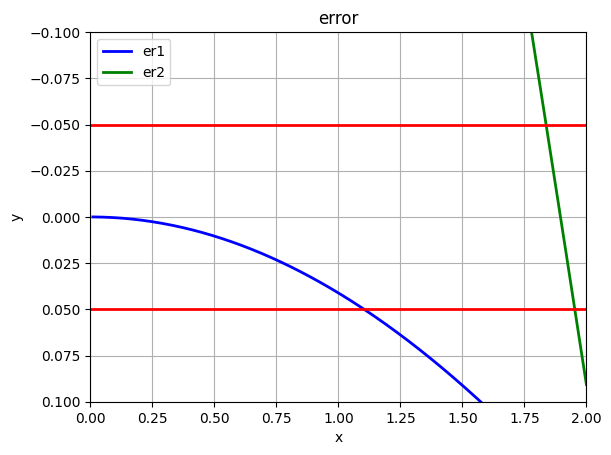

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Coordenadas de los puntos que forman la línea recta
x_r = [0, 1,10]
y_r = [0.05, 0.05,0.05]
y_r2 = [-0.05, -0.05,-0.05]

x = np.linspace(0.01, 2, 400)

h1 = (x - 2 * np.sin(x/2)) / x
h2 = (x - 2 * np.sin(x)) / x

# Crear el gráfico
plt.plot(x, h1, label='er1', color='blue', linewidth=2)
plt.plot(x, h2, label='er2', color='green', linewidth=2)
plt.plot(x_r, y_r, color='red', linestyle='solid', linewidth=2)
plt.plot(x_r, y_r2, color='red', linestyle='solid', linewidth=2)

# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')

# Título del gráfico
plt.title('error')
plt.xlim(0,2)
plt.ylim(0.1,-0.1)
# Mostrar el gráfico
plt.grid(True)
plt.legend()
plt.show()

Observando este ultimo grafico de error se puese observar que para bajas frecuecias el sistema h1 actua como un mejor derivador que el h2, mientras el derivador h2 actua como un mejor derivador para frecuencias mas altas. Otro dato importante a tomar en cuenta es que el ancho de banda del derivador h1 es conciderablemente mayor que el derivador h2.

# 2) Se dispone del siguiente filtro digital:

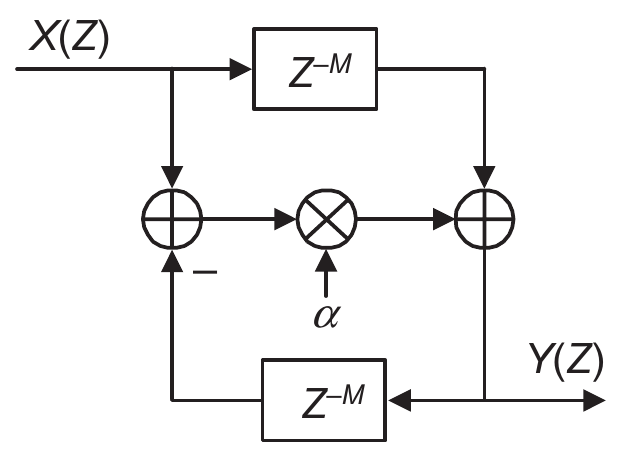  
  
a) Para la transferencia del filtro con M = 2 y α=0.8; calcular 
1) el diagrama de polos y ceros y
2) la respuesta en frecuencia demódulo
4) fase y
5) retardo de grupo.  
b) Si quisiéramos anular una senoidal interferente de 125 Hz y su segunda armónica, y sólo dispone de un sumador y el filtro de la figura con M = 4. Proponga un esquema de la solución y calcule los parámetros del filtro que sería necesario adecuar.

<font size = 5><center>
$T(z) = \alpha\frac{z^{M}+\frac{1}{\alpha}}{z^{M}+\alpha} = 0.8.\frac{z²+1.25}{z^{2}+0.8}$
</center>


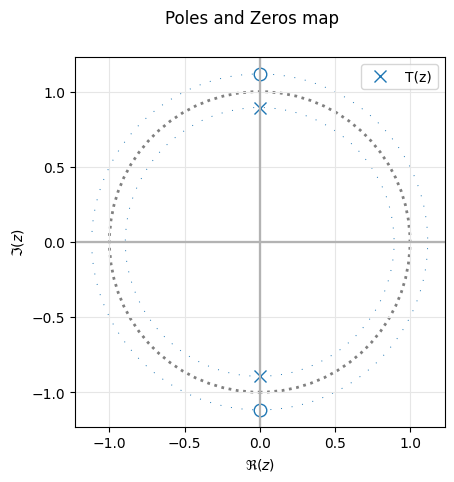

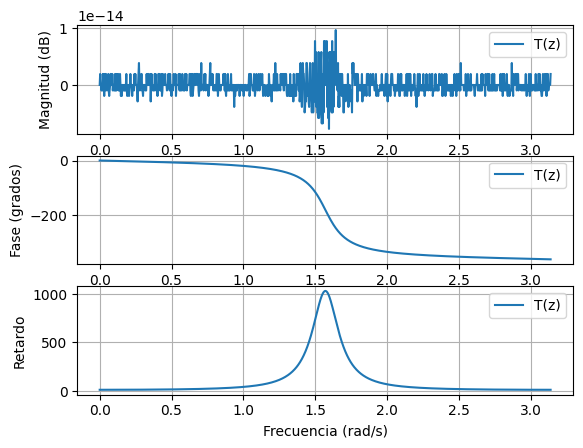

In [71]:
## Calculos anteriores pero utilizando funciones especificas
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap
from pytc2.general import print_subtitle

alpha = 0.8
# T
T = signal.dlti([alpha,0,1],[1,0,alpha])

pzmap(T,digital = True,filter_description="T(z)")

w_t, mag_t, phase_t = signal.dlti.bode(T, 10**3)

#Calculo el retardo sabiendo que es el darivada del restardo negado
retardo = -np.gradient(phase_t,w_t)

# Crea una figura para el gráfico
plt.figure()

# Gráfico de magnitud
plt.subplot(3, 1, 1)
plt.plot(w_t, mag_t, label='T(z)')
plt.grid(True)
plt.ylabel('Magnitud (dB)')
plt.legend()

# Gráfico de fase
plt.subplot(3, 1, 2)
plt.plot(w_t, phase_t, label='T(z)')
plt.grid(True)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.legend()

# Gráfico de retardo
plt.subplot(3, 1, 3)
plt.plot(w_t, retardo, label='T(z)')
plt.grid(True)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Retardo')
plt.legend()

# Mostrar el gráfico
plt.show()

# B)
Para solucionar este porblema necesitaremos de un elimina banda el cual elimine dos frecuencias. Este lo pordremos obtener sumando la señal del sistema antes de filtrarse con la señal del sistema al pasarlo por el pasa todo.
<font size = 5><center>
$T_{pt}(z) = \alpha\frac{z^{M}+\frac{1}{\alpha}}{z^{M}+\alpha} = 0,8.\frac{z⁴+1,25}{z^{4}+0,8}$  
$T_{el}(z) = 0,8.\frac{z⁴+1,25}{z^{4}+0,8}+1 = \frac{z⁴.1,8+1,8}{z^{4}+0,8}$
</center>

Para poder elimar a $125Hz$ y a su segunda armonica, $250Hz$, tendremos antes que calcular la distancia entre ceros. Una manera rapida de calcular la distancia entre ceros es sabiendo que para las funciones del tipo $z^n+k$ los polos se encuentran equidistanciados a una distancia de $\frac{2.pi}{k}$ entre ellos. En este caso $n = 4$ por lo tanto la separacion entre polos es de $\pi/2$ con este dato podremos saber calcular la frecuencia de muestreo que debemos utilizar para poder eliminar las dos frecuencias pedidas.  
Para poder eliminarlas tenemos que hacer una regla de tres simple:  
<center>
$f_s/2 \Rightarrow \pi$  
    </center>  
<center>
$250Hz-125Hz \Rightarrow \pi/2$  
</center>  
$f_s/2 = \pi.\frac{250Hz-125Hz}{\pi/2} \Rightarrow f_s = 500Hz$  

(1, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

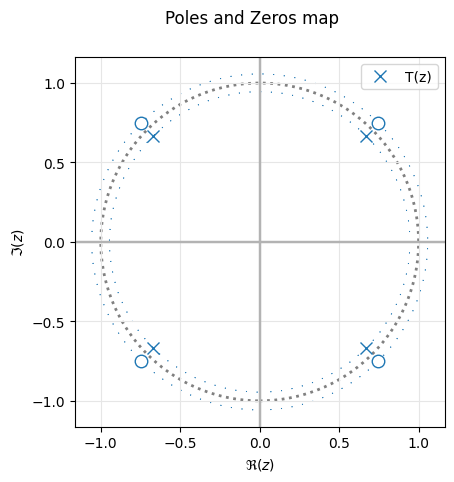

In [78]:
## Calculos anteriores pero utilizando funciones especificas
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap
from pytc2.general import print_subtitle

fs = 500/(2*np.pi)  #Divido por 2*pi porque el grafico esta en velocidad angular
alpha = 0.8
# T
T = signal.dlti([alpha,0,0,0,1],[1,0,0,0,alpha], dt = 1/fs)

pzmap(T,digital = True,filter_description="T(z)", fs = fs)